In [66]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('spotify_songs.csv')

# Define the columns you want to keep
desired_columns = ['playlist_genre', 'playlist_subgenre', "valence", 'key', "mode", "danceability", "tempo", "energy", "loudness", "speechiness", 'acousticness', "instrumentalness", "liveness"]

# Create a new DataFrame with only the desired columns
df = df[desired_columns]

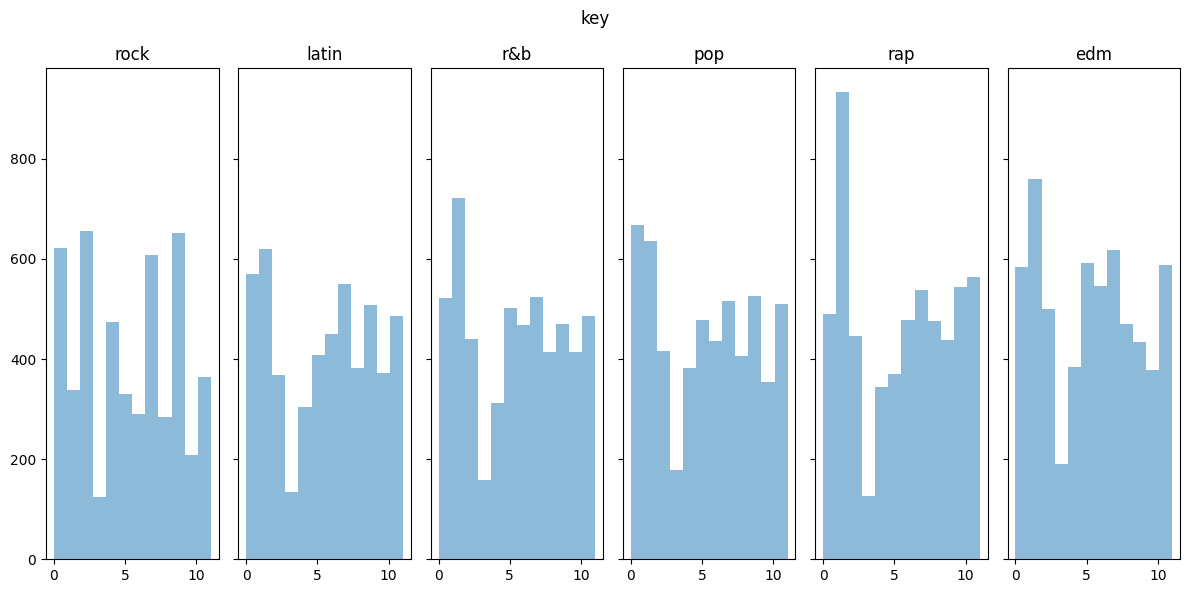

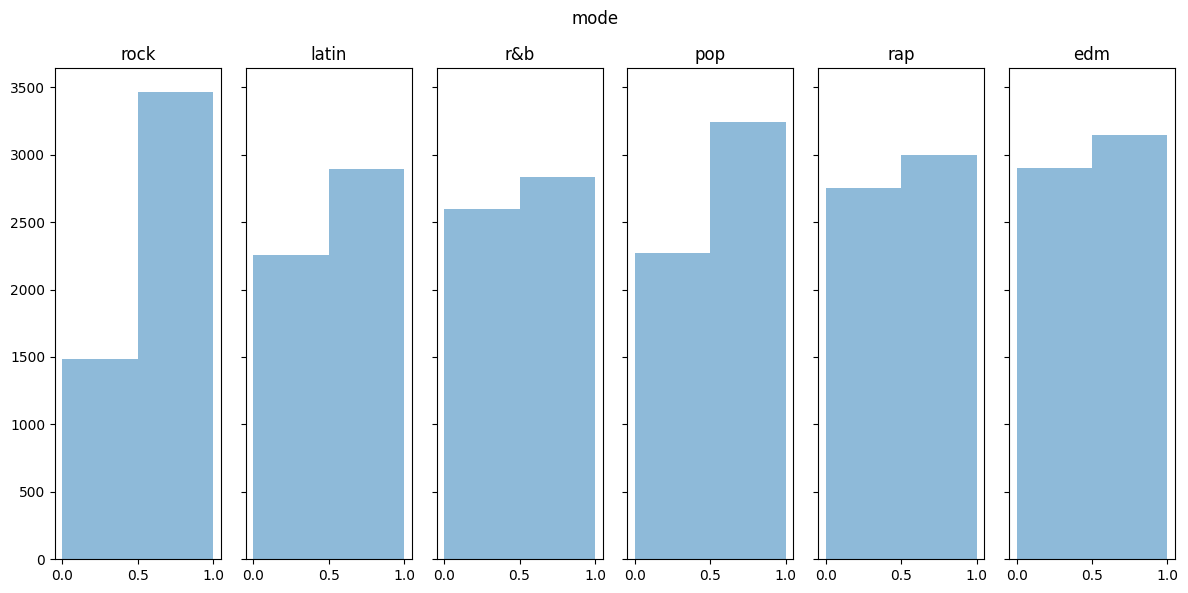

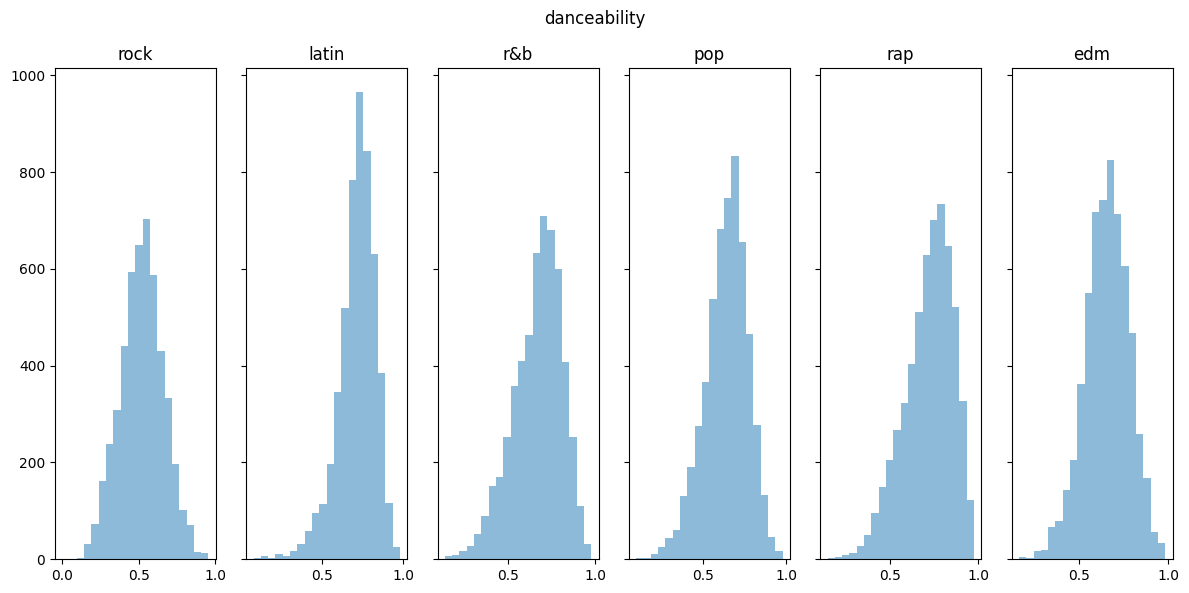

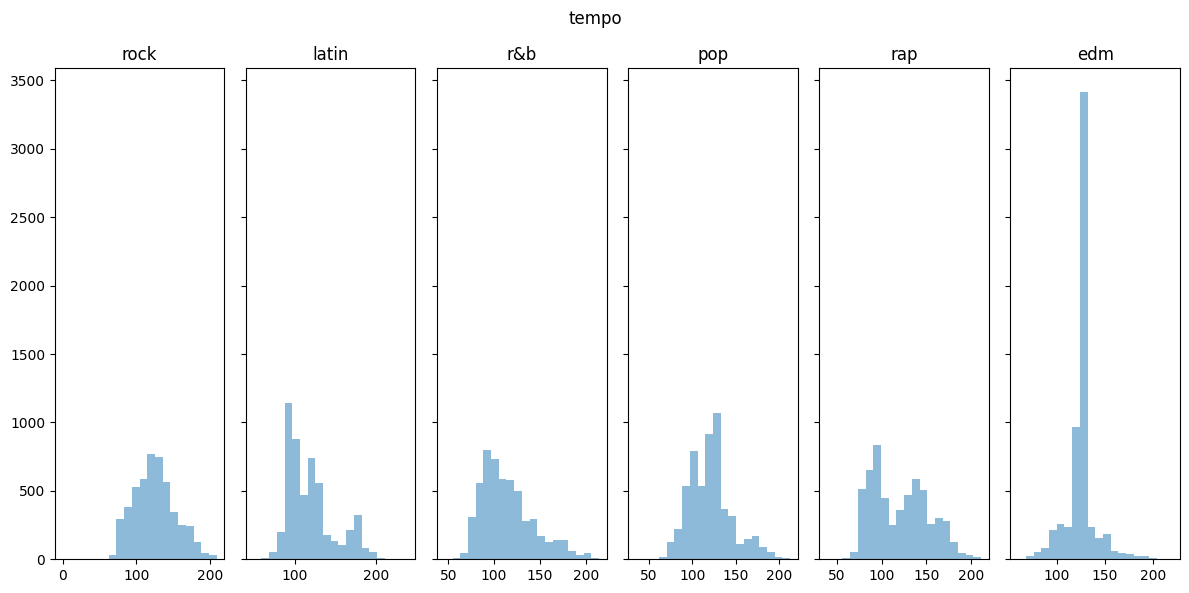

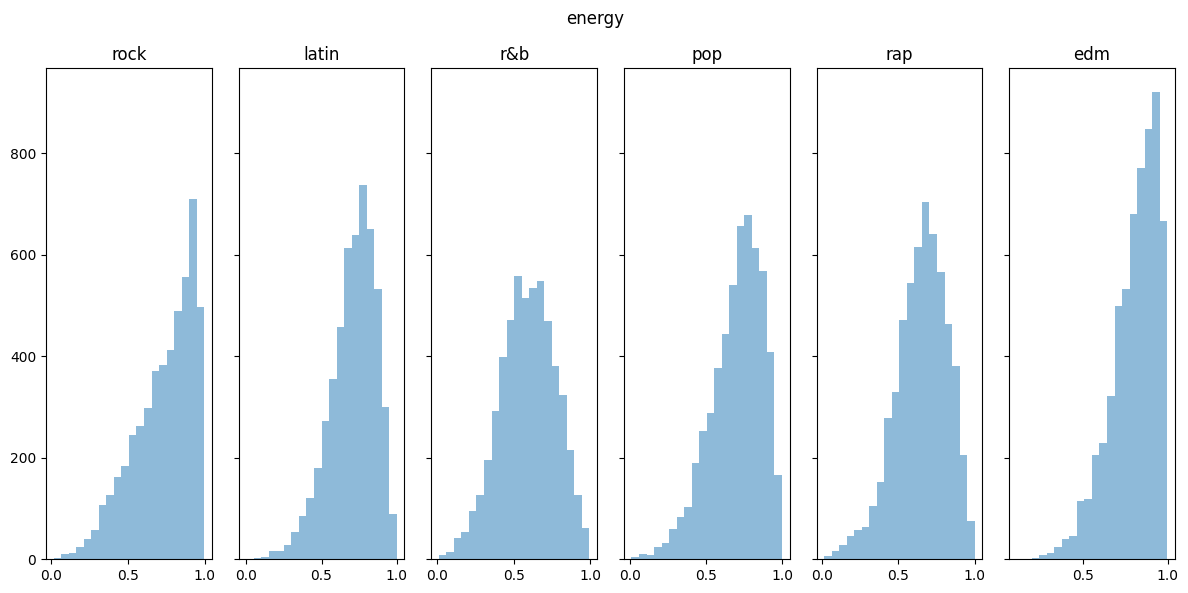

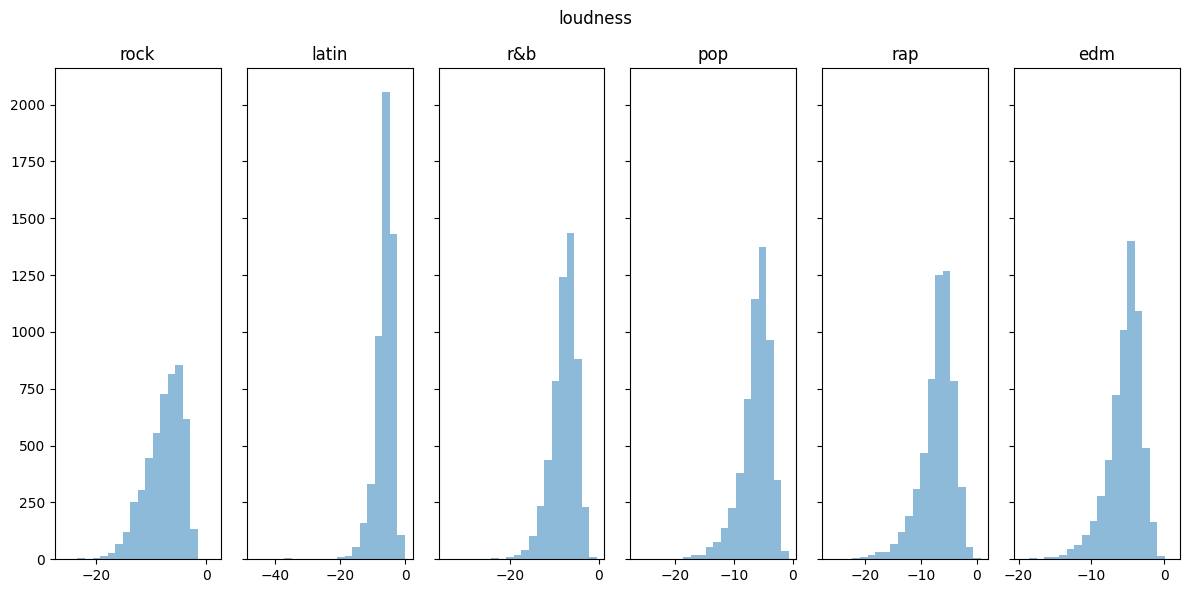

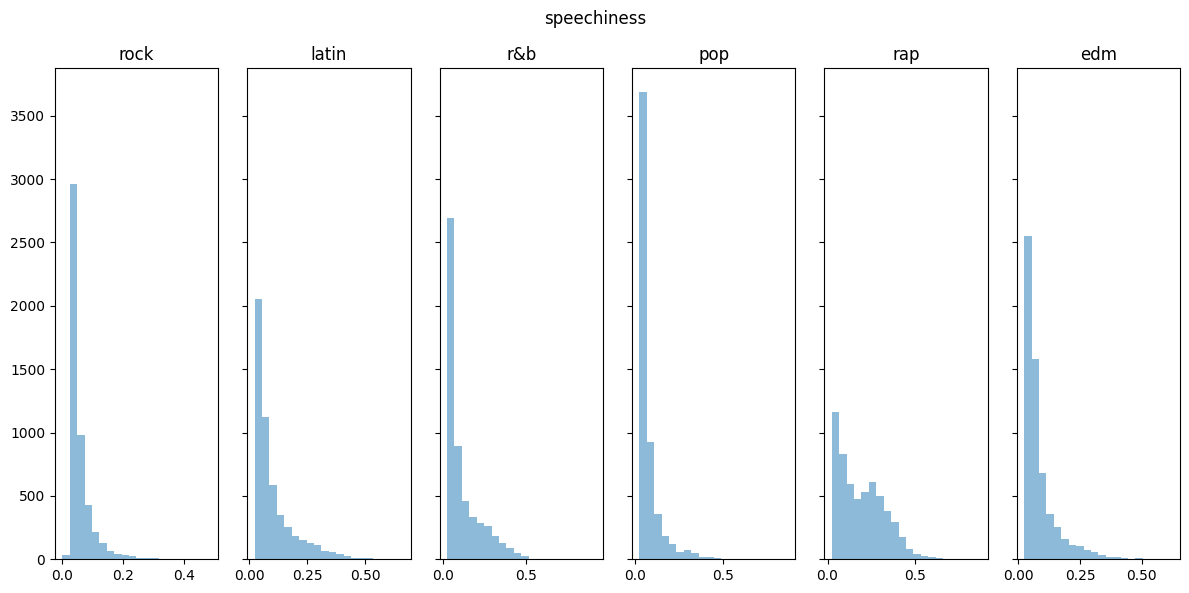

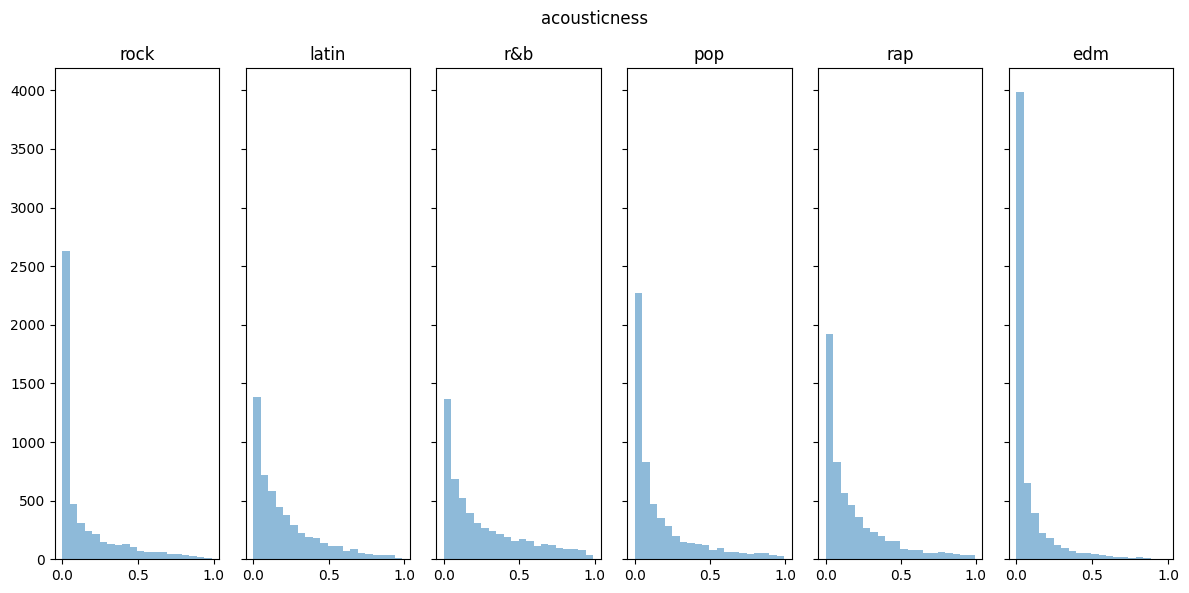

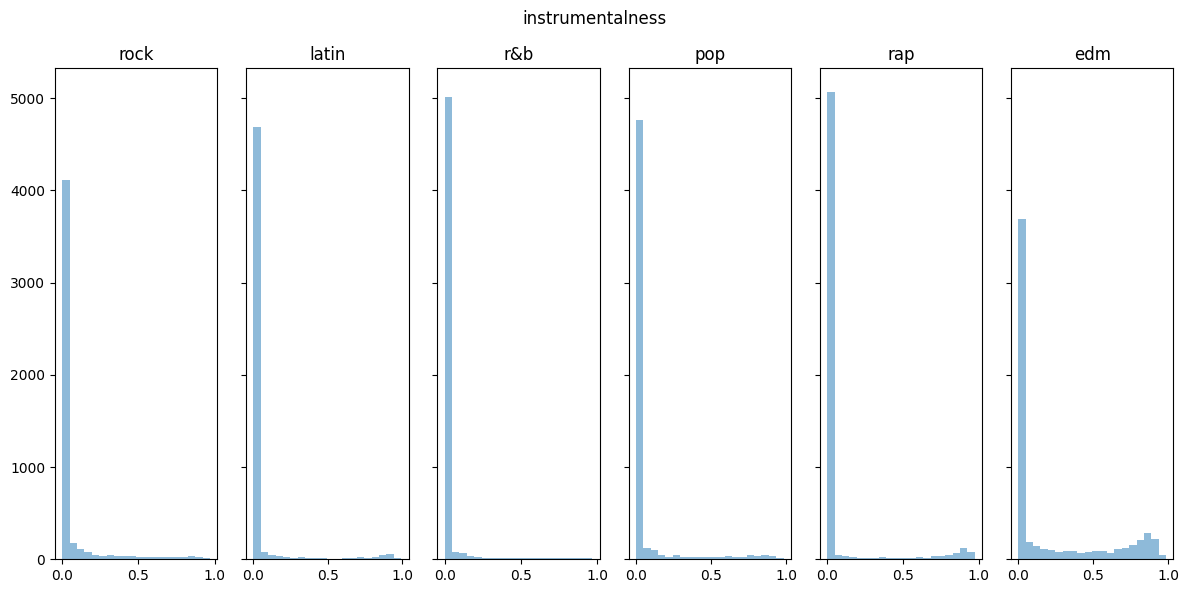

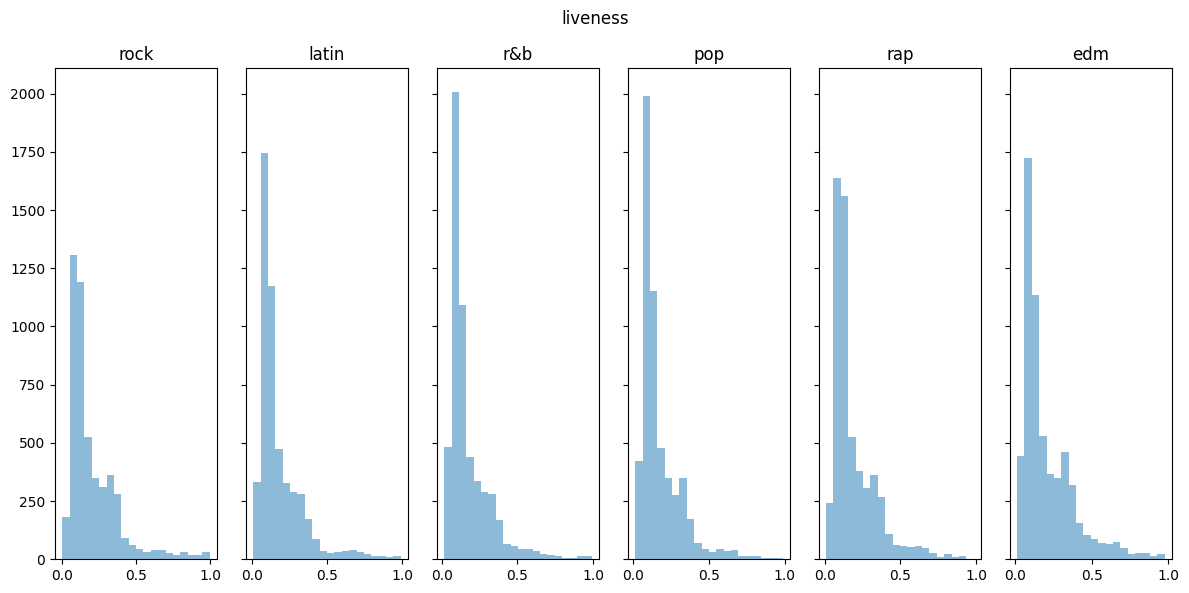

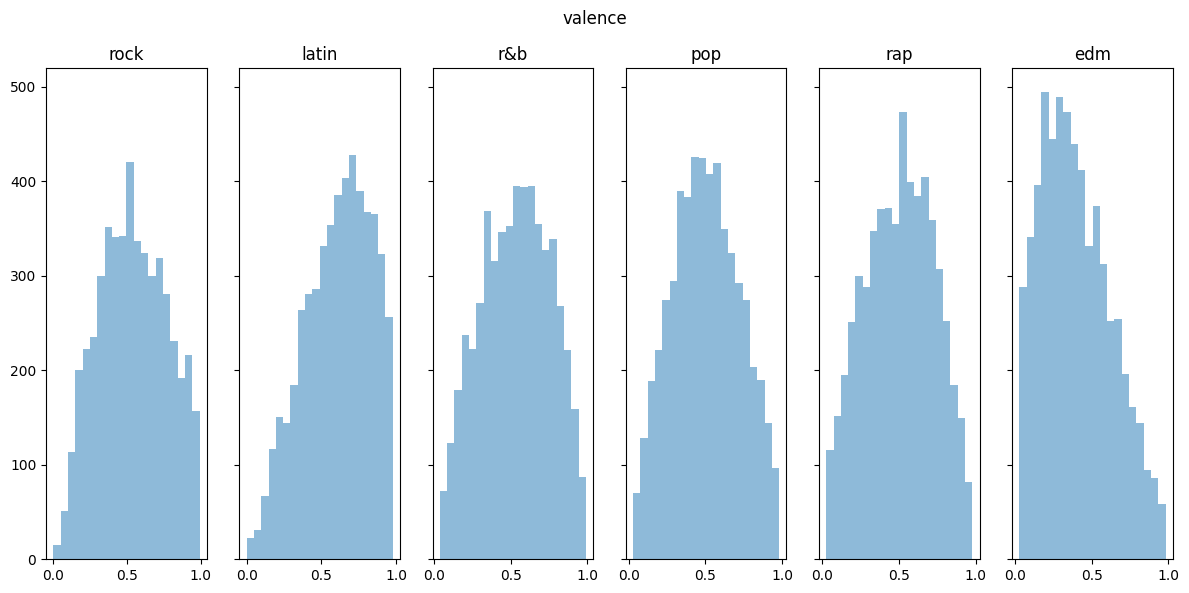

In [67]:
import matplotlib.pyplot as plt

genres = ['rock', 'latin', 'r&b', 'pop', 'rap', 'edm']
features = {'key': 12, "mode": 2, "danceability": 20, "tempo": 20, "energy": 20, "loudness": 20, "speechiness": 20, 'acousticness': 20, "instrumentalness": 20, "liveness": 20, "valence": 20}



for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=len(genres), figsize=(12, 6), sharey=True)

    for i, genre in enumerate(genres):
        ax = axes[i]
        ax.hist(df[df['playlist_genre'] == genre][feature], bins=features[feature], alpha=0.5, label=genre)
        ax.set_title(genre)

    plt.suptitle(feature)
    plt.tight_layout()
    plt.show()

In [68]:
# import matplotlib.pyplot as plt

# subgenres = ["dance pop", "post-teen pop", "electropop", "southern hip hop", "hip hop", "indie poptimism", "trap", "album rock", "hard rock", "gangster rap", "classic rock", "permanent wave", 
#              "tropical", "latin pop", "reggaeton", "latin hip hop", "urban contemporary", "hip pop", "big room", "new jack swing", "neo soul", "electro house", "pop edm", "progressive electro house"]
# features = {'key': 12, "mode": 2, "danceability": 20, "tempo": 20, "energy": 20, "loudness": 20, "speechiness": 20, 'acousticness': 20, "instrumentalness": 20, "liveness": 20, "valence": 20}



# for feature in features:
#     fig, axes = plt.subplots(nrows=1, ncols=len(subgenres), figsize=(30, 6), sharey=True)

#     for i, subgenre in enumerate(subgenres):
#         ax = axes[i]
#         ax.hist(df[df['playlist_subgenre'] == subgenre][feature], bins=features[feature], alpha=0.5, label=subgenre)
#         ax.set_title(subgenre)

#     plt.suptitle(feature)
#     plt.tight_layout()
#     plt.show()

In [69]:
# df.drop(columns={"playlist_subgenre", "mode", "key", "tempo"}, inplace=True)
# genres = {'rock' : 0, 'latin': 1, 'r&b':2, 'pop':3, 'rap' : 4, 'edm' : 5}

subgenreDict = {'dance pop' : 0, 'post-teen pop' : 1, 'electropop' : 2, 'indie poptimism' : 3,
       'hip hop' : 4, 'southern hip hop' : 5, 'gangster rap' : 6, 'trap' : 7,
       'album rock' : 8, 'classic rock' : 9, 'permanent wave' : 10, 'hard rock' : 11,
       'tropical' : 12, 'latin pop' : 13, 'reggaeton' : 14, 'latin hip hop' : 15,
       'urban contemporary' : 16, 'hip pop' : 17, 'new jack swing' : 18, 'neo soul' : 19,
       'electro house' : 20, 'big room' : 21, 'pop edm' : 22,
       'progressive electro house' : 23}
df['playlist_subgenre'] = df['playlist_subgenre'].map(subgenreDict)

df.head()




,playlist_genre,playlist_subgenre,valence,key,mode,danceability,tempo,energy,loudness,speechiness,acousticness,instrumentalness,liveness
0,pop,0,0.518,6,1,0.748,122.036,0.916,-2.634,0.0583,0.1020,0.000000,0.0653
1,pop,0,0.693,11,1,0.726,99.972,0.815,-4.969,0.0373,0.0724,0.004210,0.3570
2,pop,0,0.613,1,0,0.675,124.008,0.931,-3.432,0.0742,0.0794,0.000023,0.1100
3,pop,0,0.277,7,1,0.718,121.956,0.930,-3.778,0.1020,0.0287,0.000009,0.2040
4,pop,0,0.725,1,1,0.650,123.976,0.833,-4.672,0.0359,0.0803,0.000000,0.0833


In [70]:
y = df.pop("playlist_genre")
y = y.to_frame()
y.head()



,playlist_genre
0,pop
1,pop
2,pop
3,pop
4,pop


In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes="(100,)")
mlp.fit(X_train_scaled, y_train)

y_pred_train = mlp.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Predict on the testing set
y_pred_test = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)



InvalidParameterError: The 'hidden_layer_sizes' parameter of MLPClassifier must be an array-like or an int in the range [1, inf). Got '(100,)' instead.